In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

# Feature importance
import shap

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/Users/ommukundushir/techgium/flood.csv")

data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [3]:
print("Data set size:\n")
print(f"Rows = {data.shape[0]}")
print(f"Columns = {data.shape[1]}")


Data set size:

Rows = 50000
Columns = 21


In [4]:

print("==" * 35)
print(" " * 22, "Data set Information")
print("==" * 35)
print(data.info())

                       Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  500

In [5]:
print("Total duplicate rows:\n")
print(data.duplicated().sum())

Total duplicate rows:

0


In [6]:
df_null_values = data.isnull().sum().to_frame().rename(columns = {0:'count'})
df_null_values['%'] = (df_null_values['count'] / len(data)) * 100
df_null_values = df_null_values.sort_values(by = '%', ascending = False)
df_null_values

,count,%
MonsoonIntensity,0,0.0
DrainageSystems,0,0.0
PoliticalFactors,0,0.0
InadequatePlanning,0,0.0
WetlandLoss,0,0.0
PopulationScore,0,0.0
DeterioratingInfrastructure,0,0.0
Watersheds,0,0.0
Landslides,0,0.0
CoastalVulnerability,0,0.0


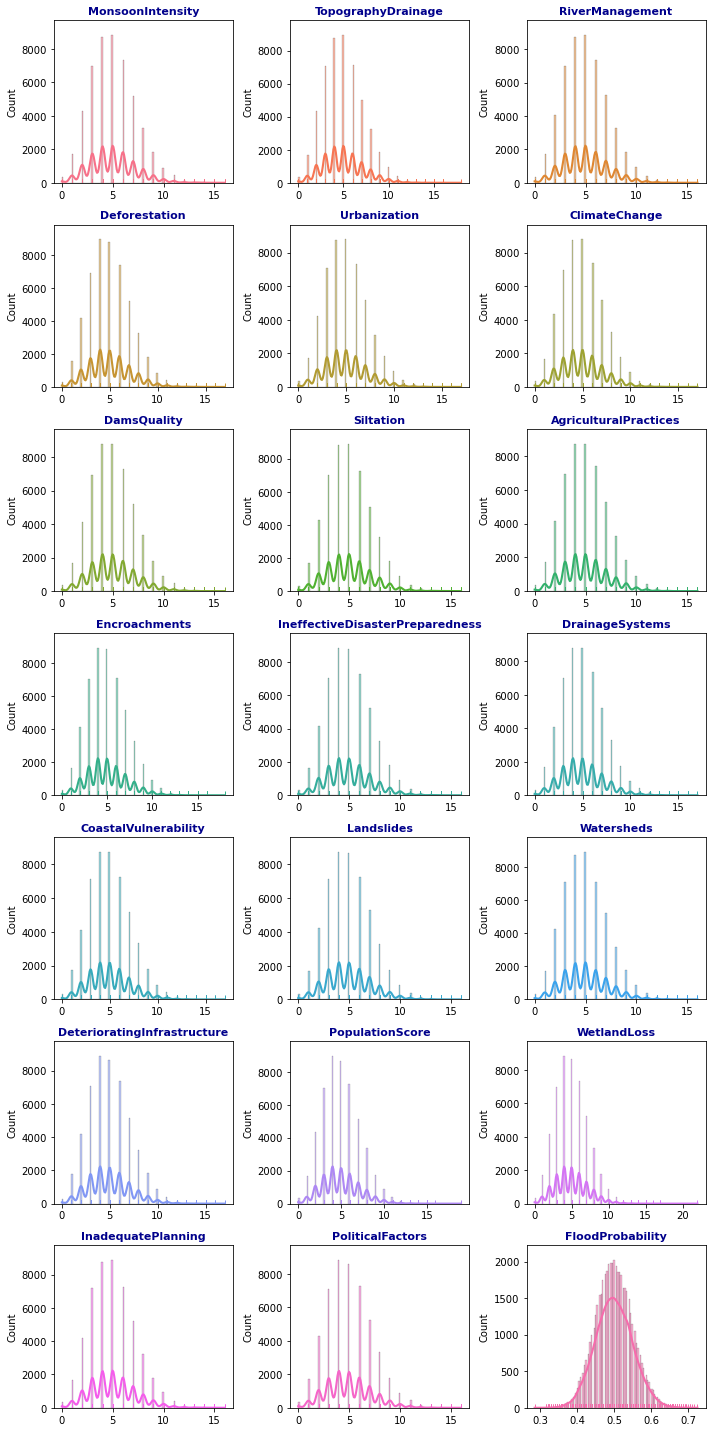

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('husl', n_colors=len(data.columns))

fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(10, 20))
ax = ax.flat
for i, col in enumerate(data.columns):
    try:
        sns.histplot(data, x=col, color=colors[i], kde=True, line_kws={'linewidth': 2.1}, ax=ax[i])
        sns.rugplot(data[col], color=colors[i], ax=ax[i])  # Modified this line
        ax[i].set_xlabel("")
        ax[i].set_title(col, fontsize=11, fontweight="bold", color="darkblue")
    except Exception as e:
        print(f"Error plotting column {col}: {e}")

fig.tight_layout()
plt.show()

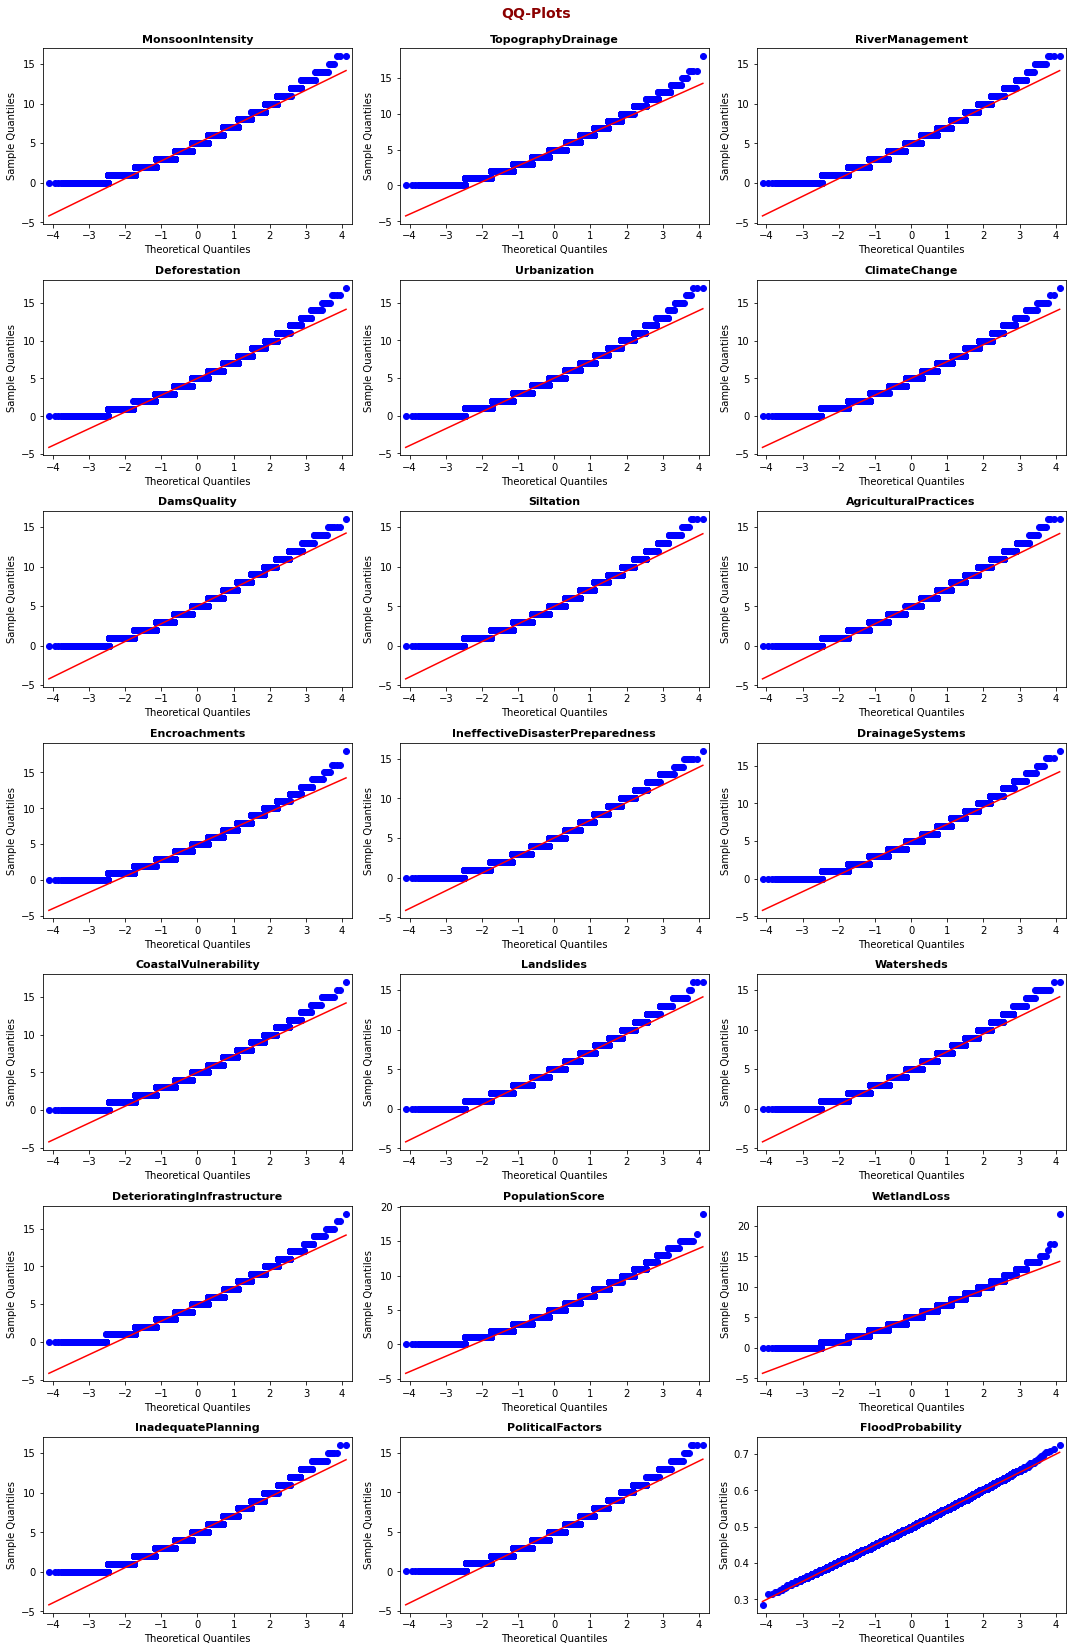

In [10]:

fig,ax = plt.subplots(nrows = 7, ncols = 3, figsize = (15,23))
ax = ax.flat
for i,col in enumerate(data.columns):
    qqplot(data[col], ax = ax[i], line = 's')
    ax[i].set_title(col, fontsize = 11, fontweight = "bold", color = "black")
    
fig.suptitle("QQ-Plots", fontsize = 14, fontweight = "bold", color = "darkred", y = 0.995)
fig.tight_layout()
fig.show()

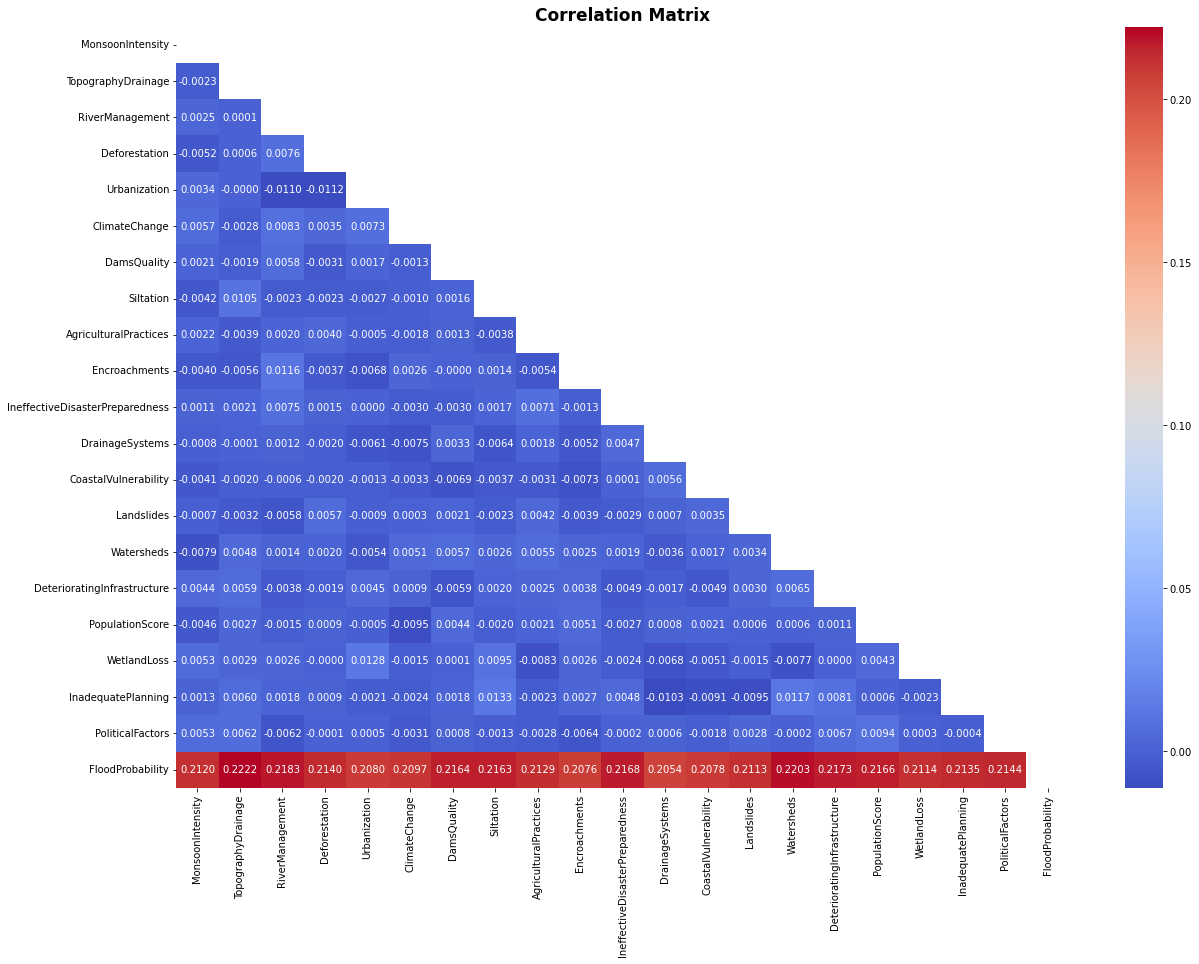

In [11]:
corr_matrix = data.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (20,14))
sns.heatmap(corr_matrix, cmap = "coolwarm", annot = True, fmt = ".4f", mask = mask, annot_kws = {'fontsize':10},ax = ax)
ax.set_title("Correlation Matrix", fontsize = 17, fontweight = "bold",color = "black")
fig.show()

In [12]:
X = data.drop("FloodProbability", axis = 1)
y = data["FloodProbability"]

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = SEED)

In [13]:
binarizer = Binarizer(threshold = 0.5)

y_train_bin = binarizer.fit_transform(y_train.values.reshape(-1,1))
y_test_bin = binarizer.transform(y_test.values.reshape(-1,1))

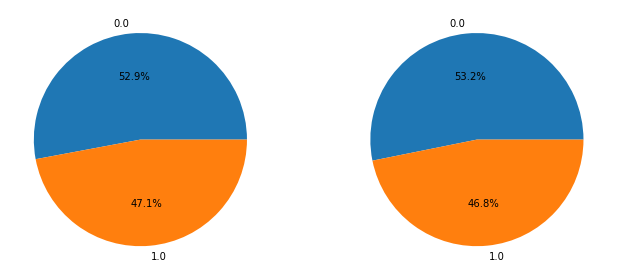

In [14]:
df_target_train = pd.Series(y_train_bin.squeeze()).value_counts().to_frame()
labels_train = df_target_train.index.to_list()
values_train = df_target_train.iloc[:, 0]

df_target_test = pd.Series(y_test_bin.squeeze()).value_counts().to_frame()
labels_test = df_target_test.index.to_list()
values_test = df_target_test.iloc[:, 0]

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax = ax.flat
ax[0].pie(x = values_train, labels = labels_train, autopct = "%1.1f%%")
ax[1].pie(x = values_test, labels = labels_test, autopct = "%1.1f%%")
fig.tight_layout()
fig.show()

In [15]:
lr = LogisticRegression(random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
et = ExtraTreesClassifier(random_state = SEED)
xgb = XGBClassifier(random_state = SEED)
lgbm = LGBMClassifier(random_state = SEED, class_weight = "balanced")
cb = CatBoostClassifier(random_state = SEED, auto_class_weights = "SqrtBalanced", verbose = 0)

In [16]:
MODELS = [lr, rf, et, xgb, lgbm, cb]

accuracy_train = {}
accuracy_test = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train, y_train_bin)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train[name] = accuracy_score(y_train_bin.squeeze(), y_pred_train)
    accuracy_test[name] = accuracy_score(y_test_bin.squeeze(), y_pred_test)
    print(f"* {name} finished")

 17%|█▋        | 1/6 [00:00<00:00,  9.47it/s]

* LogisticRegression finished


 33%|███▎      | 2/6 [00:04<00:10,  2.51s/it]

* RandomForestClassifier finished


 50%|█████     | 3/6 [00:07<00:08,  2.96s/it]

* ExtraTreesClassifier finished


 67%|██████▋   | 4/6 [00:08<00:03,  1.89s/it]

* XGBClassifier finished


 83%|████████▎ | 5/6 [00:08<00:01,  1.38s/it]

* LGBMClassifier finished


100%|██████████| 6/6 [00:12<00:00,  2.12s/it]

* CatBoostClassifier finished


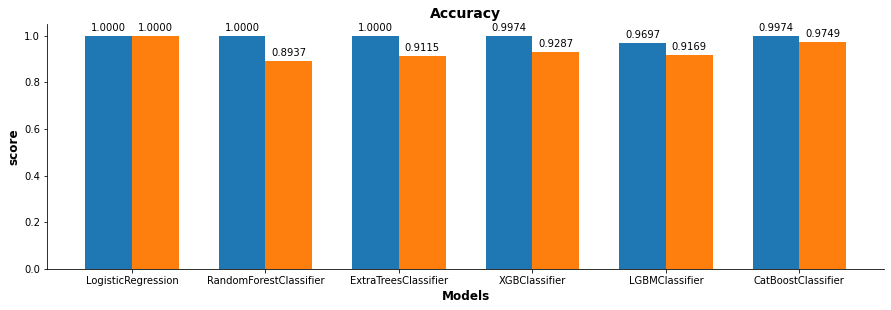

In [17]:
metric_train = pd.DataFrame.from_dict(accuracy_train, orient = 'index').rename(columns = {0:'train'})
metric_test = pd.DataFrame.from_dict(accuracy_test, orient = 'index').rename(columns = {0:'test'})

df_metric = pd.concat([metric_train, metric_test], axis = 1)

labels = df_metric.index.to_list()
values_train = df_metric.iloc[:, 0]
values_test = df_metric.iloc[:, 1]

x = np.arange(len(labels))
width = 0.35

fig,ax = plt.subplots(figsize = (15, 4.5))

rects1 = ax.bar(x = x - width/2, height = values_train, width = width)
rects2 = ax.bar(x = x + width/2, height = values_test, width = width)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Accuracy", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Models", fontsize = 12, fontweight = "bold")
ax.set_ylabel("score", fontsize = 12, fontweight = "bold")

ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(text = f'{height:.4f}', 
                    xy = (rect.get_x() + rect.get_width()/2, height), 
                    xytext = (0,3), 
                    textcoords = "offset points", 
                    ha = "center", 
                    va = "bottom")
        
autolabel(rects1)
autolabel(rects2)
fig.show()

In [19]:
model = LogisticRegression(random_state = SEED)
model.fit(X_train, y_train_bin)

LogisticRegression(random_state=42)

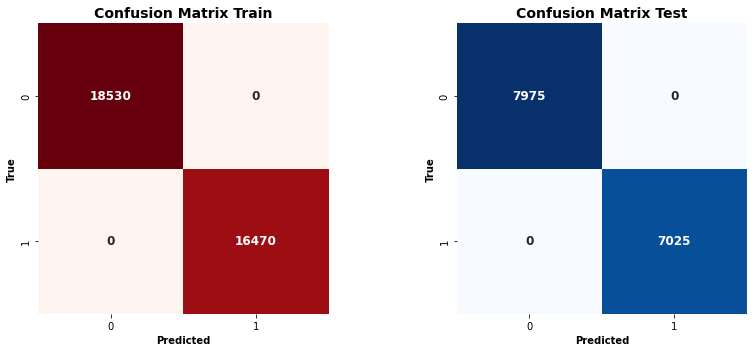

In [22]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train_bin.squeeze(), y_pred_train)
conf_matrix_test = confusion_matrix(y_test_bin.squeeze(), y_pred_test)

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax = ax.flat

sns.heatmap(conf_matrix_train, cmap = "Reds", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[0])
ax[0].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_ylabel("True", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_title("Confusion Matrix Train", fontsize = 14, fontweight = "bold", color = "black")

sns.heatmap(conf_matrix_test, cmap = "Blues", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[1])
ax[1].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_ylabel("True", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_title("Confusion Matrix Test", fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()


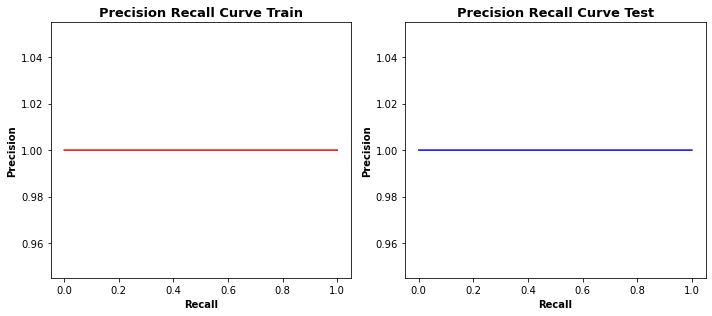

In [23]:
y_pred_prob_train = model.predict_proba(X_train)[:,1]
y_pred_prob_test = model.predict_proba(X_test)[:,1]

precision_train, recall_train, _ = precision_recall_curve(y_train_bin, y_pred_prob_train)
precision_test, recall_test, _ = precision_recall_curve(y_test_bin, y_pred_prob_test)

fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4.5))
ax = ax.flat

ax[0].plot(recall_train, precision_train, color = "red")
ax[0].set_xlabel("Recall", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_ylabel("Precision", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_title("Precision Recall Curve Train", fontsize = 13, fontweight = "bold", color = "black")

ax[1].plot(recall_test, precision_test, color = "blue")
ax[1].set_xlabel("Recall", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_ylabel("Precision", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_title("Precision Recall Curve Test", fontsize = 13, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

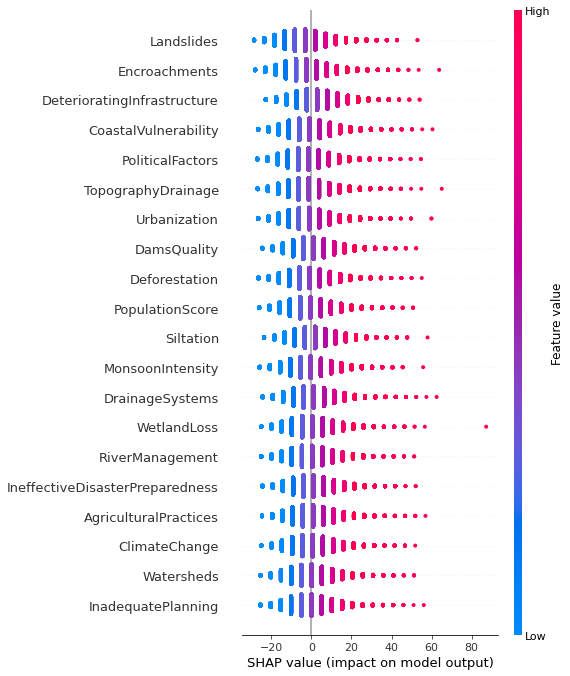

In [24]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.initjs()